# 🎡 캐글 놀이터 (252~261p) 🎡

## 🎈 놀이터에서 얻어갈 것 🎈

- **Part 1** : 모델 또는 모델의 사용 방법을 이해하는 데 유용한 용어와 팁에 대해 배운다.
- **Part 2** : 경진 대회에서 사용하는 모델에는 어떤 것이 있고, 어떠한 관점에서 모델을 선택하는지 알아본다.
- **Part 3** : 그래디언트 부스팅 결정 트리라고 불리는 GBDT는 무엇이고, 특징은 어떤 것들이 있는지 알아본다.
- **Part 4** : GBDT에서 자주 쓰는 라이브러리를 알아보고 실제 구현에 적용해 본다.

***

## Part 1.

### Overfitting과 Underfitting

- **과적합(Overfitting)** : 학습 데이터의 랜덤한 노이즈까지 과도하게 학습되어 학습 데이터에서는 점수가 좋지만 그 외의 데이터에서는 점수가 좋지 않게 나오는 현상
- **과소적합(Underfitting)** : 학습 데이터의 성질이 충분히 학습되지 않아 학습 데이터 뿐만 아니라 그 외의 데이터에서에서도 점수가 좋지 않게 나오는 현상

경진 대회에서 만드는 것처럼 **성능을 중시하는 모델에서는 학습 데이터와 검증 데이터의 점수가 서로 달라도 크게 문제가 되지 않는다.**

하지만 **검증 데이터와 테스트 데이터의 점수가 서로 다를 때는** 이들 데이터의 분포가 서로 다르고 테스트 데이터의 행 개수가 적다는 등의 이유로 어쩔 수 없는 상황일 때도 있지만, **특별한 이유가 따로 없다면 검증이 제대로 되었는지를 살펴볼 필요가 있을 수 있다.**

### Regularization

- **정규화(Regularization)** : 복잡한 학습 모델에게 제약을 주는 기법

정규화를 거치면 제약조건으로 인해 일정 수준으로 **모델의 복잡도가 줄어들어 Overfitting을 억제할 수 있다.**

대부분의 모델에 정규화항(Regularization term)이 포함되어 있어 정규화의 강도를 지정하는 하이퍼 파라미터를 조정함으로서 모델의 복잡함을 제어할 수 있게 된다.

### 학습 데이터와 검증 데이터의 점수 모니터링

**GBDT나 신경망과 같이 순차적으로 학습흐름이 이어지는 모델**에서는 학습 데이터와 그 목적변수 외에도, 모니터링할 평가 지표 및 검증 데이터와 그 목적변수를 전달함으로써 학습 데이터와 검증 데이터 각각의 점수 추이를 볼 수 있다.

모델이 잘 학습하고 있는지에 대한 정보를 얻음과 동시에, 이후에 나오는 조기 종료(Early Stopping)에도 사용한다.

경진 대회에서는 GBDT나 신경망이 주로 활용되므로, 모델을 학습할 때 검증 데이터도 기본적으로 제공된다면 더 수월할 수 있다.

### 조기 종료(Early Stopping)

GBDT와 신경망 등의 라이브러리에는 조기 종료(Early Stopping)이라는 기능이 있다.

- **조기 종료(Early Stopping)** : 학습 시 검증 데이터의 점수를 모니터링하다가 일정 시간 동안 점수가 오르지 않으면 중간에 학습을 중단하는 기능

학습 데이터에 대한 점수는 학습이 진행될수록 어느 정도까지는 좋아지다가, 그 이후에 학습 데이터에 Overfitting 되어 일반화 성능이 떨어지는 현상을 방지하는 데 목적을 두고 있다.

특징이나 기타 하이퍼 파라미터에 따라 최적의 학습 반복(iteration)의 횟수는 달라질 수 있다. 만약 **Early Stopping을 설정하지 않는다면, 모델의 상황에 따라 반복 횟수를 순차적으로 재설정해야 하지만, 조기 종료 기법을 사용하면 최적의 반복 횟수에 도달했을 때 자동으로 중단시켜주므로 편리하다.**

**학습 데이터의 점수는 점점 좋아지는 반면 검증 데이터의 점수는 어느 정도 선에서 멈추게 된다.**

이러한 형태의 학습의 진행과 점수를 그래프로 나타내면 다음과 같다.

- 참고 : 이 그래프는 log loss를 나타내는 그래프로 **평가 점수로서 로그 손실(log loss)이 작은 쪽을 좋은 평가 지표**로 본다.

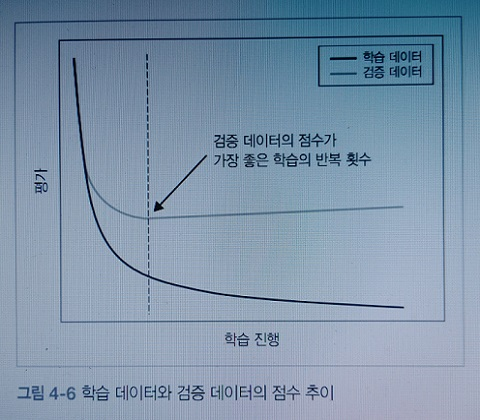

### 배깅(Bagging)

- **배깅(Bagging)** : 여러 모델을 조합하여 모델을 구축하는 방법

**같은 종류의 모델을 병렬로 구축하고 이들 예측값의 평균 또는 최빈값을 이용해 예측을 진행한다.**

각각의 모델에서 데이터나 특징의 일부만 랜덤 선택하여 추출하는 샘플링을 진행함으로써 일반화 성능을 더 높이려는 경우가 많다.

다른 방법으로는 학습에 사용하는 난수 시드(Random seed)만을 바꾸어 평균을 구할 수도 있다.

배깅은 bootstrap aggregating이라는 단어에서 유래한 것으로, **좁은 의미로는 중복을 허용하는 복원 추출로 데이터를 샘플링하는 부트스트랩 샘플을 이용하는 방법을 말한다.** 주로 랜덤 포레스트 등의 모델이 배깅을 이용한다.

### 부스팅(Boosting)

- **부스팅(Boosting)** : 배깅과 마찬가지로 여러 모델을 조합하여 모델을 구축하는 방법

**같은 종류의 모델을 직렬로 조합하고 학습을 통해 예측값을 보정하면서 순서대로 하나씩 모델을 학습시킨다.**

**GBDT의 B가 나타내는 것이 결국 부스팅이다.** GBDT는 부스팅을 이용하고 있다고 볼 수 있다.

### 배깅과 부스팅의 큰 차이

같은 종류의 모델을 어떻게 조합하고 구축하는가?

## Part 2.

### 표 형태의 정형 데이터를 다루는 경진 대회에서 사용하는 모델

- 그래디언트 부스팅 결정트리 (GBDT)
- 신경망
- 선형 모델

**아래는 기타 모델들이다.**
- k-최근접 이웃 알고리즘 (k-nearest neighbor algorithm, KNN)
- 랜덤 포레스트 (random forest, RF)
- 익스트림 랜덤트리 (extremely randomized trees, ERT)
- regularized greedy forest (RGF)
- field-aware factorization machines (FFM)

### 경진 대회에서 모델을 선택하는 주요 관점

- 모델의 성능
- 연산 속도
- 사용 편의성
- 다양성으로 앙상블에서의 모델 성능 향상에 기여하는지에 대한 여부

모델의 성능이 최우선이겠지만, 다양한 시행착오를 거치는 만큼 연산 속도나 사용 편의성도 눈여겨 볼 필요가 있다.

또한 모델 자체의 성능이 높지 않아도, 모델의 성능이 높은 다른 모델과는 조금 다른 관점에서 예측하여 앙상블 모델의 성능 향상에 기여할 수 있다고 판단되면 모델로 채택될 수 있다.

특히 **GBDT는 모델 성능과 연산 속도, 사용 편의성이 모두 뛰어난 모델이라서 보통의 경우에 가장 먼저 만들어지는 모델이다.**

신경망은 다소 다루기 어려운 경우가 있지만, 어떤 문제를 접하느냐에 따라 좋은 선택지가 될 수도 있는 모델이다.

선형 모델은 Overfitting하기 쉬운 특수 대회에서 사용되는 모델이다.

그 외 기타 모델에 언급된 모델들은 주로 다양성에 공헌하여 앙상블에서 모델의 성능을 올리는 것이 목표가 된다.

한편 **GBDT, RF, ERT, RGF**는 모두 결정 트리에 기반을 두고 있는 모델이다.

결정 트리로 학습하고 예측할 때 하나의 결정 트리만으로는 충분한 예측이 어려워서 여러 개를 조합하지만, 그 조합이 가진 구조나 학습 알고리즘은 각각 다르다.

하지만 지도 학습 모델로서 자주 소개되는 모델로 **서포트 벡터 머신(support vector machine)**이라는 게 있는데, 이것은 **모델의 성능과 연산 속도가 떨어지는 관계**로, 모델로서는 그다지 자주 쓰지 않는다.

**경진 대회에서 모델을 선택하는 방법은 아래 그림을 참고하면 된다.**

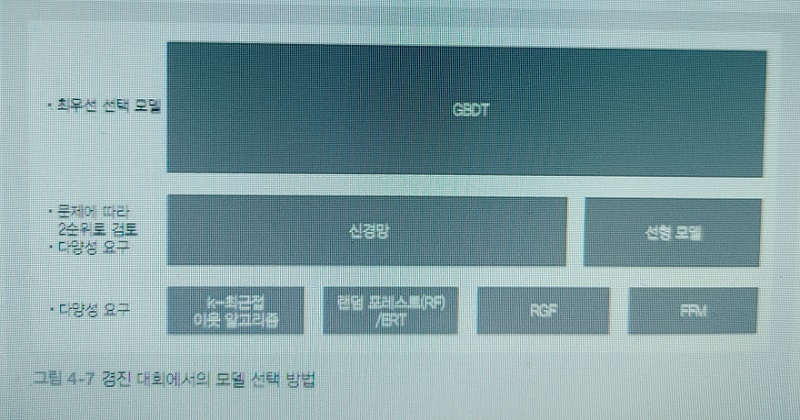

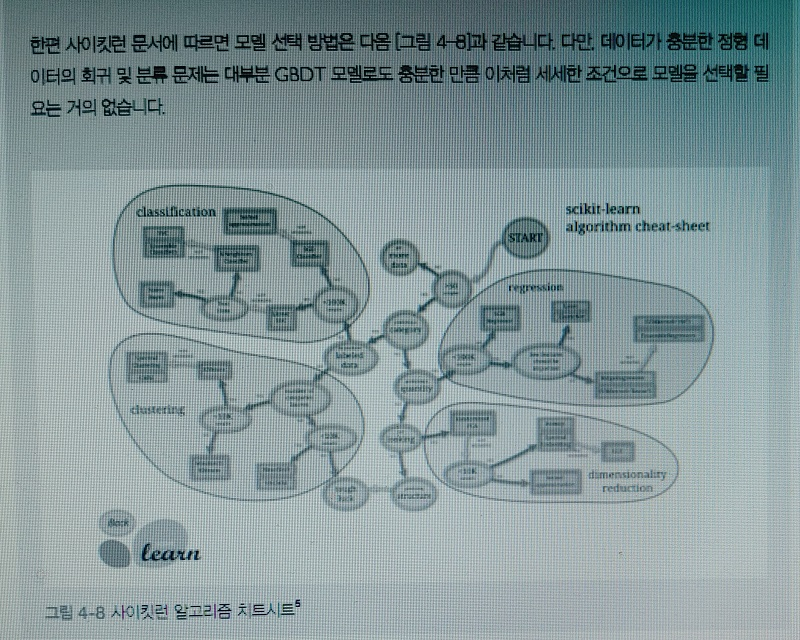

## Part 3.

### GBDT 개요

그래디언트 부스팅 결정 트리(gradient boosting decision tree)라고 불리는 GBDT는 **모델의 성능과 사용 편의성이 높아 경진 대회에서 차지하는 존재감이 매우 강하다.**

실제로 **경진 대회에서 가장 처음 만드는 모델은 대부분 이 모델을 사용**하며, 이 모델만을 사용하여 **상위 랭크에 입상**한 사례도 있다.

앞에서도 언급했듯이ㅡ 결정 트리로 학습하고 예측할 때 하나의 결정 트리만으로는 충분한 예측이 어려워서 다수의 결정 트리를 조합하는 경우가 많다. **GBDT는 이러한 다수의 결정 트리로 이루어진 모델 구조를 띤다.**

**학습은 아래 순서로 진행이 되며, 각 결정 트리의 분기 및 잎(leaf)의 가중치가 정해진다.**

- 목적변수와 예측값으로부터 계산되는 목적함수를 개선하고자 결정 트리를 작성하여 모델에 추가
- 하이퍼 파라미터에서 정한 결정 트리의 개수만큼 위의 스텝을 반복

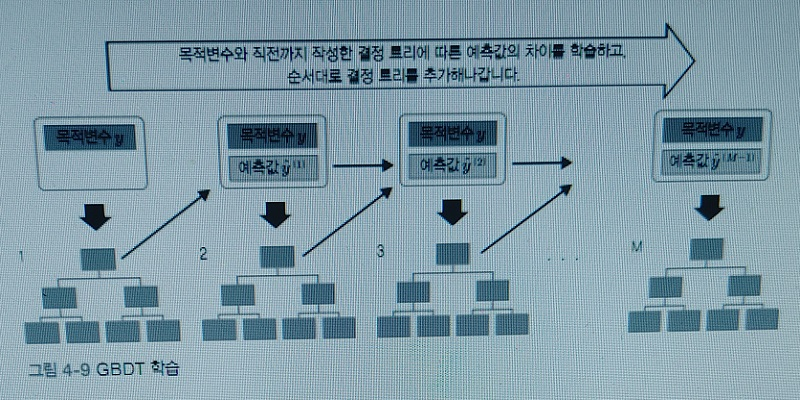

그림에서 두 번째 이후의 결정 트리부터는 목적변수와 직전까지 작성한 결정 트리에 따른 예측값의 차이를 학습하게 된다.

트리를 작성하는 동안 모델의 예측값이 목적변수의 실제 값에 가까워져서, 작성되는 결정 트리의 가중치는 학습을 거듭할수록 차츰 작아진다.

최종적인 예측값은 예측 대상 데이터를 각각의 결정 트리에서 예측한 결과 즉, 각 결정 트리의 예측된 잎의 가중치를 합한 결과이다.

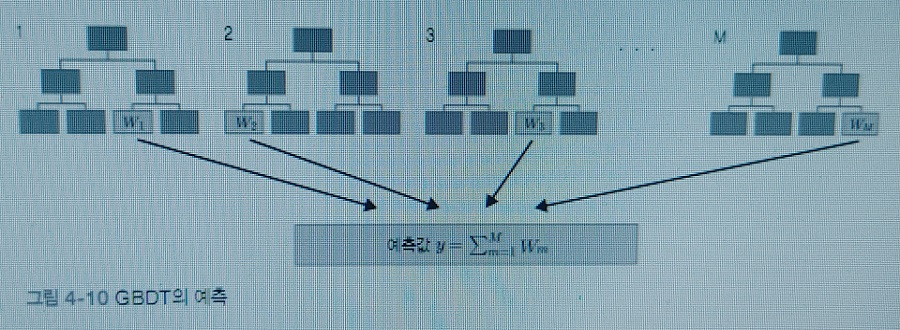

아래 그림은 '컴퓨터 게임을 좋아하는가?' 라는 이진 분류 문제에서 결정 트리를 2개만 작성한 GBDT의 예측 사례이다.

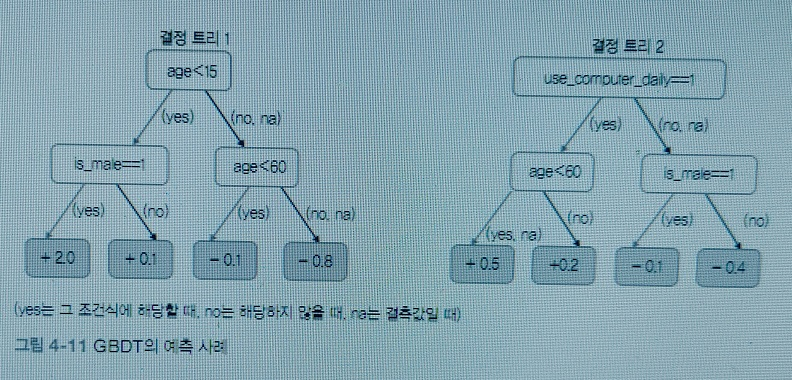

위 그림으로 미루어 보았을 때, **15세 미만의 여성이면서 일상적으로 컴퓨터를 사용할 경우의 예측값은 0.1 + 0.5를 더한 0.6이 된다.**

이 문제는 분류 문제이므로 다시 이것을 확률로 변환해 예측 확률로서 출력이 된다.

그렇다면 19세 여성이 일상적으로 컴퓨터를 사용할 경우의 예측값은 얼마일까? 한 번 생각해 보자.

첫 번째 결정 트리의 첫 분기에서는 나이가 15세 미만이면 왼쪽, 그 이상이거나 결측값이면 오른쪽으로 나뉜다.

각 분기에서는 어떤 값보다 큰지 작은지를 파악하며, 결측값일 때는 어느 쪽으로 나뉘는지도 결정할 수 있다.

Part 1에서 언급했던 배깅과 부스팅을 기억하는가?

랜덤 포레스트가 같은 종류의 모델을 병렬로 작성한 예시였고, GBDT가 같은 종류의 모델을 직렬로 작성한 예시였다.

**GBDT에서는 직전까지 작성한 결정 트리의 예측값을 새로운 결정 트리의 예측값에 반영해 가면서 조금씩 수정해 나가는 방식이다.**

### GBDT 특징

**특징은 수치로 표현되어야 한다.**
- 아까 전에 각 분기에서는 어떤 값보다 큰지 작은지, 결측값일 때는 어느 쪽으로 나뉘는지 등을 파악한다고 했었다.
- 이러한 내용을 표현하려면 특징은 수치로 표현되어져야 한다.

**결측값을 다룰 수 있다.**
- 결측값일 때는 결정 트리의 분기에서 어느 한 쪽으로 나뉠 수 있으므로, 꼭 결측값을 채우지 않아도 그대로 사용이 가능하다.

**변수 간 상호작용이 반영된다.**
- 분기의 반복에 따라 변수 간 상호작용이 반영된다.

**💥이 외 기타 GBDT가 가질 수 있는 특징에는 다음과 같은 것들이 있다.💥**
- 모델의 성능이 높다.
- 매개변수 튜닝을 하지 않아도 모델의 성능이 좋다.
- 불필요한 특징이 추가되어 있어도 모델의 성능이 떨어지지 않는다.

아래는 사용 편의성 측면에서 갖는 GBDT의 특징이다.

**특징값의 범위를 스케일링할 필요가 없다.**
- 결정 트리는 각각의 특징에서 값의 크고 작은 관계만을 다루므로, 표준화 등의 스케일링은 할 필요가 없다.

**범주형 변수를 원-핫 인코딩하지 않아도 된다.**
- 수치화해야 하는 특징으로 인해 레이블 인코딩은 필요할 수 있지만, 대부분의 경우 원-핫 인코딩은 거의 필요가 없다.
- 예시로 어떤 범주형 변수 c가 1부터 7까지 있는 상태에서 c가 3일 때만 효과가 있다면 결정 트리의 분기를 (c<5, c>=5)와 (c<=5, c>5)로 거듭함으로써 c가 3이라는 특징을 추출할 수 있다.

**희소 행렬에 대응한다.**
- scipy-sparse 모듈의 csr_matrix나 csc_matrix 등의 희소 행렬을 입력하는 것이 가능하다.

## Part 4.

### GBDT의 주요 라이브러리

주요 라이브러리로는 아래와 같이 대표적으로 3가지를 들 수 있다.
- **xgboost (https://xgboost.readthedocs.io/en/latest/)**
- **lightgbm (https://lightgbm.readthedocs.io/en/latest)**
- **catboost (https://catboost.ai/docs/)**

이번 프레젠테이션에서는 위 3개의 모델 중 오래 사랑받았고 관련 자료도 많은 **xgboost 라이브러리를 활용하게 될 것이다.**

xgboost는 2014년에 공개된 라이브러리로 모델의 성능과 편의성 부분에서 우수성을 인정받아 경진 대회를 석권했다.

lightgbm은 2016년에 공개된 라이브러리로 xgboost의 영향을 받아 학습이나 예측 알고리즘이 xgboost에 상당히 가까운 모델이다.

속도적인 측면에서 지지를 받으면서 xgboost와 함께 경진 대회에서 인기가 높다.

catboost는 2017년에 공개된 라이브러리로 범주형 변수의 취급 방법 등 몇몇 측면에서 연구가 이루어져 왔으며, 앞선 두 모델과 성격이 조금 다른 모델이다.

한편, **사이킷런의 ensemble 모듈의 GradientBoostingRegressor 클래스와 GradientBoostingClassifier 클래스도 역시 GBDT 기반의 모델이다.**

다만 결정 트리의 분기나 잎의 가중치를 구하는 방법, 정규화 등에서는 다른 점이 많아 모델 성능과 연산 속도 측면에서 모두 xgboost보다 떨어지는 부분이 있어서 많이 쓰이지 않는다.